In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math
import sys
import os
sys.path.append('../') #pongo los 2 puntos para que salga de la carpeta
import src.soporte_preprocesamiento as sp
# Gráficos 
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\DELL\\Git\\Clases\\Semana 7\\datos\\online_shoppers_intention_clase.csv', index_col=0)

In [3]:
nomb_columnas = {col: col.replace ('_', '') for col in df.columns}
df.rename(columns= nomb_columnas, inplace=True)
df.sample(5)

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Administrative,ProductRelated,BounceRates
4419,62.5,0.0,0.0,2584.714286,-0.224629,16.940467,May,Windows,Google Chrome,Region1,PMCT,Returning_Visitor,8.0,101.0,0.011215
712,0.0,1.0,844.0,1108.000000,1.162287,0.000000,Mar,Windows,Google Chrome,Region4,OT,Returning_Visitor,0.0,6.0,0.066667
3300,41.0,0.0,0.0,68.500000,0.228954,0.000000,May,MacOS,Mozilla Firefox,NaN,OT,Returning_Visitor,1.0,6.0,NaN
1544,18.0,0.0,0.0,474.500000,-0.614057,0.000000,Mar,MacOS,Mozilla Firefox,Unknown,OT,Returning_Visitor,2.0,30.0,0.000000
11200,20.0,0.0,0.0,9354.484111,-0.059212,0.000000,Nov,Windows,Google Chrome,Unknown,RT,Returning_Visitor,1.0,283.0,0.003044


In [4]:
# sp.exploracion_dataframe(df, 'PageValues')

In [5]:
df.describe()

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Administrative,ProductRelated,BounceRates
count,12330.000000,12330.000000,12330.000000,12330.000000,1.233000e+04,12330.000000,11097.000000,11220.000000,10752.000000
mean,53.515570,0.503569,34.472398,1194.746220,5.016591e-01,5.889258,2.329368,31.558021,0.021988
std,137.989866,1.270156,140.749294,1913.669288,1.360703e+00,18.568437,3.319112,44.407659,0.048122
min,0.000000,0.000000,0.000000,0.000000,-7.043793e-01,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,184.137500,-3.043793e-01,0.000000,0.000000,7.000000,0.000000
50%,1.539500,0.000000,0.000000,598.936905,-4.998172e-17,0.000000,1.000000,18.000000,0.003125
75%,53.475000,0.000000,0.000000,1464.157214,6.956207e-01,0.000000,4.000000,37.000000,0.016667
max,3398.750000,24.000000,2549.375000,63973.522230,4.895621e+00,361.763742,27.000000,705.000000,0.200000


In [6]:
df.describe(include='O').T

,count,unique,top,freq
Month,12207,10,May,3337
OperatingSystems,12330,6,Windows,6601
Browser,12330,13,Google Chrome,7961
Region,10480,10,Region1,3698
TrafficType,12312,21,OT,3821
VisitorType,11714,3,Returning_Visitor,10125


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12330 entries, 0 to 12329
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AdministrativeDuration  12330 non-null  float64
 1   Informational           12330 non-null  float64
 2   InformationalDuration   12330 non-null  float64
 3   ProductRelatedDuration  12330 non-null  float64
 4   ExitRates               12330 non-null  float64
 5   PageValues              12330 non-null  float64
 6   Month                   12207 non-null  object 
 7   OperatingSystems        12330 non-null  object 
 8   Browser                 12330 non-null  object 
 9   Region                  10480 non-null  object 
 10  TrafficType             12312 non-null  object 
 11  VisitorType             11714 non-null  object 
 12  Administrative          11097 non-null  float64
 13  ProductRelated          11220 non-null  float64
 14  BounceRates             10752 non-null  flo

In [8]:
df_num = df.select_dtypes(include= np.number)

In [9]:
cols_numericas = df_num.columns
cols_numericas

Index(['AdministrativeDuration', 'Informational', 'InformationalDuration',
       'ProductRelatedDuration', 'ExitRates', 'PageValues', 'Administrative',
       'ProductRelated', 'BounceRates'],
      dtype='object')

In [10]:
import math

math.ceil(len(cols_numericas) / 2) #ceil nos redondea hacia arriba

5

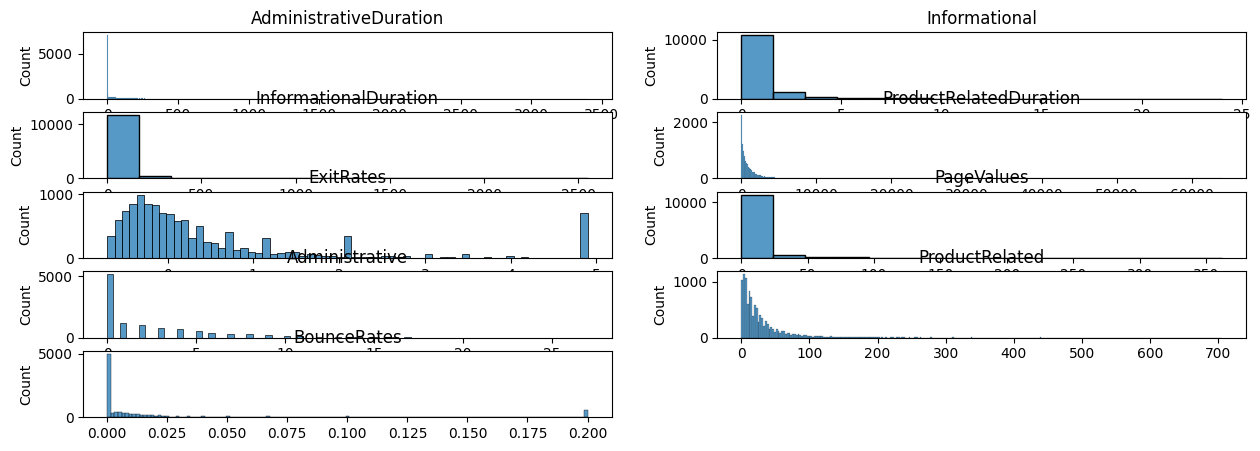

In [11]:
def separar_dataframe(dataframe):
    return dataframe.select_dtypes(include = np.number), dataframe.select_dtypes(include = 'O')

def plot_numericas(dataframe):
    cols_numericas = dataframe.columns
    num_filas = math.ceil(len(cols_numericas) / 2)
    fig, axes = plt.subplots(nrows = num_filas, ncols = 2, figsize = (15,5))
    axes = axes.flat

    for indice, columna in enumerate(cols_numericas):
        sns.histplot(x=columna, data=dataframe, ax = axes[indice])
        axes[indice].set_title(columna)
        axes[indice].set_xlabel('')
    if len(cols_numericas) % 2 != 0:
        fig.delaxes(axes[-1])
    else:
        pass

    plt.tight_layout

df_num, df_cat = separar_dataframe(df)
plot_numericas(df_num)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\3934869803.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna,
C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\3934869803.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna,
C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\3934869803.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=columna,
C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\3934869803.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

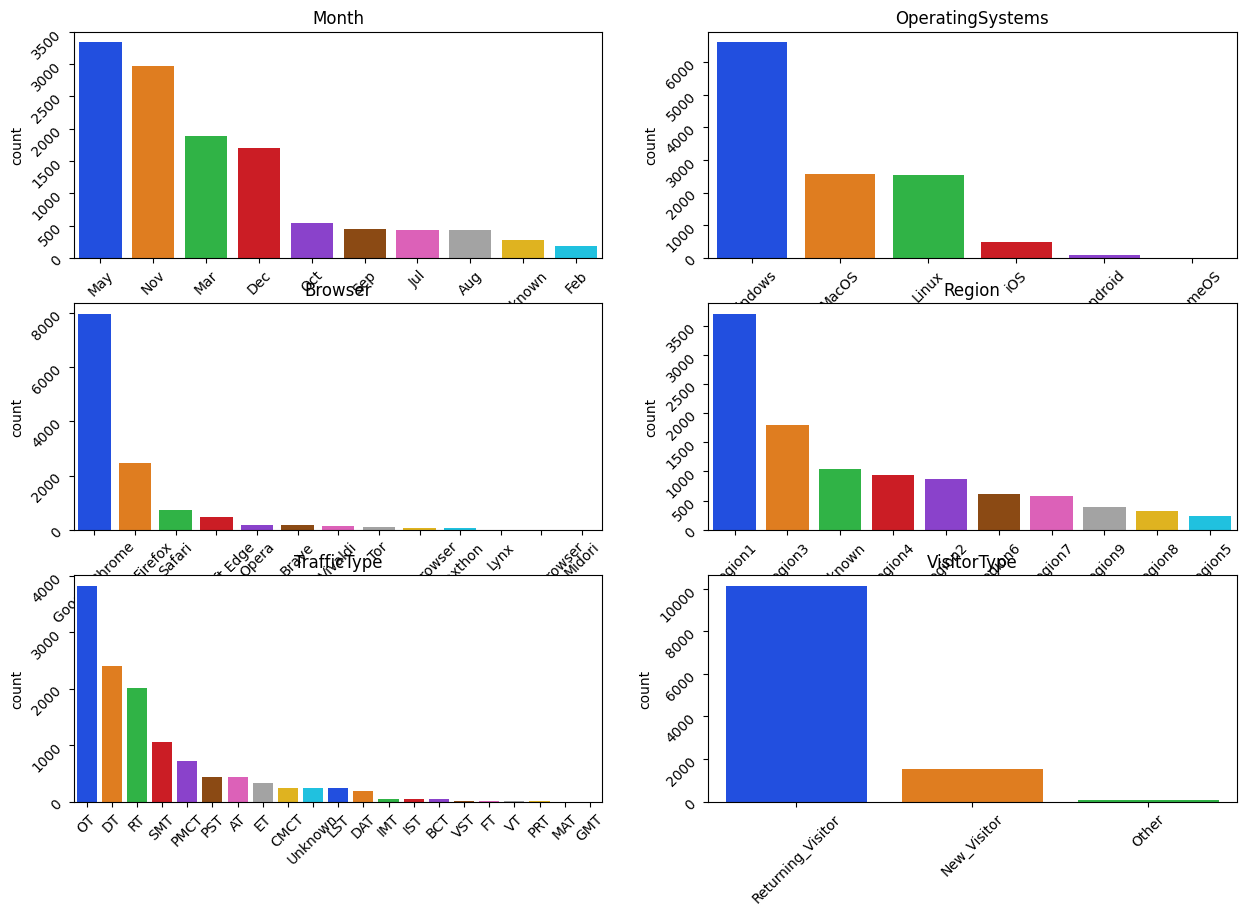

In [12]:
def plot_categoricas(dataframe, paleta = 'bright', tamaño_graficas = (15,10)):
    cols_categoricas = dataframe.columns
    num_filas = math.ceil(len(cols_categoricas) / 2)
    fig, axes = plt.subplots(nrows = num_filas, ncols = 2, figsize = tamaño_graficas)
    axes = axes.flat

    for indice, columna in enumerate(cols_categoricas): # usamos countplot para categoricas
        sns.countplot(x=columna,
                      data=dataframe,
                      ax = axes[indice], 
                      palette=paleta, 
                      order = dataframe[columna].value_counts().index)
        axes[indice].set_title(columna)
        axes[indice].set_xlabel('')
        axes[indice].tick_params(rotation = 45)
    if len(cols_categoricas) % 2 != 0:
        fig.delaxes(axes[-1])
    else:
        pass

    plt.tight_layout

plot_categoricas(df_cat)

,Month,PageValues
7,Oct,8.627435
8,Sep,7.657068
6,Nov,7.070702
1,Dec,6.822210
0,Aug,5.979498


C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\2841152752.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna,


,OperatingSystems,PageValues
0,Android,16.976136
5,iOS,8.150187
4,Windows,6.791120
3,MacOS,5.194906
2,Linux,3.433227


C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\2841152752.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna,


,Browser,PageValues
0,Avant Browser,26.268249
6,Microsoft Edge,7.980572
1,Brave,7.064453
10,Safari,6.723729
3,Google Chrome,5.716805


C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\2841152752.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna,


,Region,PageValues
4,Region5,9.447994
8,Region9,9.239333
6,Region7,6.429204
0,Region1,5.950441
9,Unknown,5.898735


C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\2841152752.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna,


,TrafficType,PageValues
3,DAT,15.601086
9,IST,14.068609
5,ET,10.301613
12,OT,8.275035
2,CMCT,7.724296


C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\2841152752.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna,


,VisitorType,PageValues
1,Other,19.824411
0,New_Visitor,10.702869
2,Returning_Visitor,5.021516


C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\2841152752.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columna,


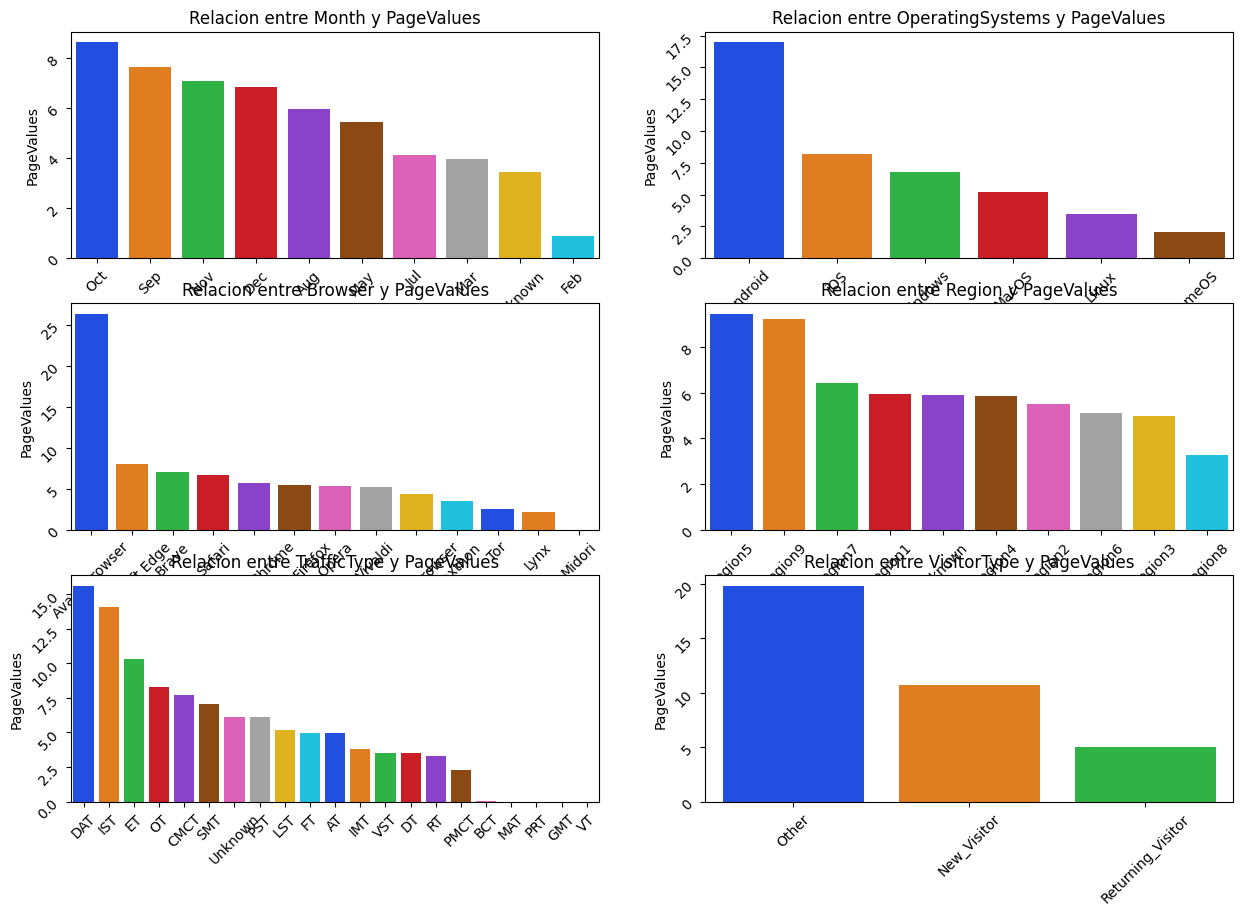

In [13]:
def relacion_vr_categoricas(dataframe, variable_respuesta, paleta = 'bright', tamaño_graficas = (15,10)):
    df_cat = separar_dataframe(dataframe)[1]
    cols_categoricas = df_cat.columns
    num_filas = math.ceil(len(cols_categoricas) / 2)
    fig, axes = plt.subplots(nrows = num_filas, ncols = 2, figsize = tamaño_graficas)
    axes = axes.flat

    for indice, columna in enumerate(cols_categoricas):
        datos_agrupados = dataframe.groupby(columna)[variable_respuesta].mean().reset_index().sort_values(variable_respuesta, ascending= False)
        display(datos_agrupados.head())
        sns.barplot(x=columna,
                    y = variable_respuesta,
                    data=datos_agrupados,
                    ax= axes[indice], 
                    palette=paleta)
        axes[indice].tick_params(rotation = 45)
        axes[indice].set_title(f'Relacion entre {columna} y {variable_respuesta}')
        axes[indice].set_xlabel('')

relacion_vr_categoricas(df, 'PageValues')

C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\1442758250.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,
C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\1442758250.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,
C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\1442758250.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,
C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\1442758250.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,
C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\1442758250.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=columna,
C:\Users\DELL\AppData\Local\Temp\ipykernel_8020\1442758250.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigne

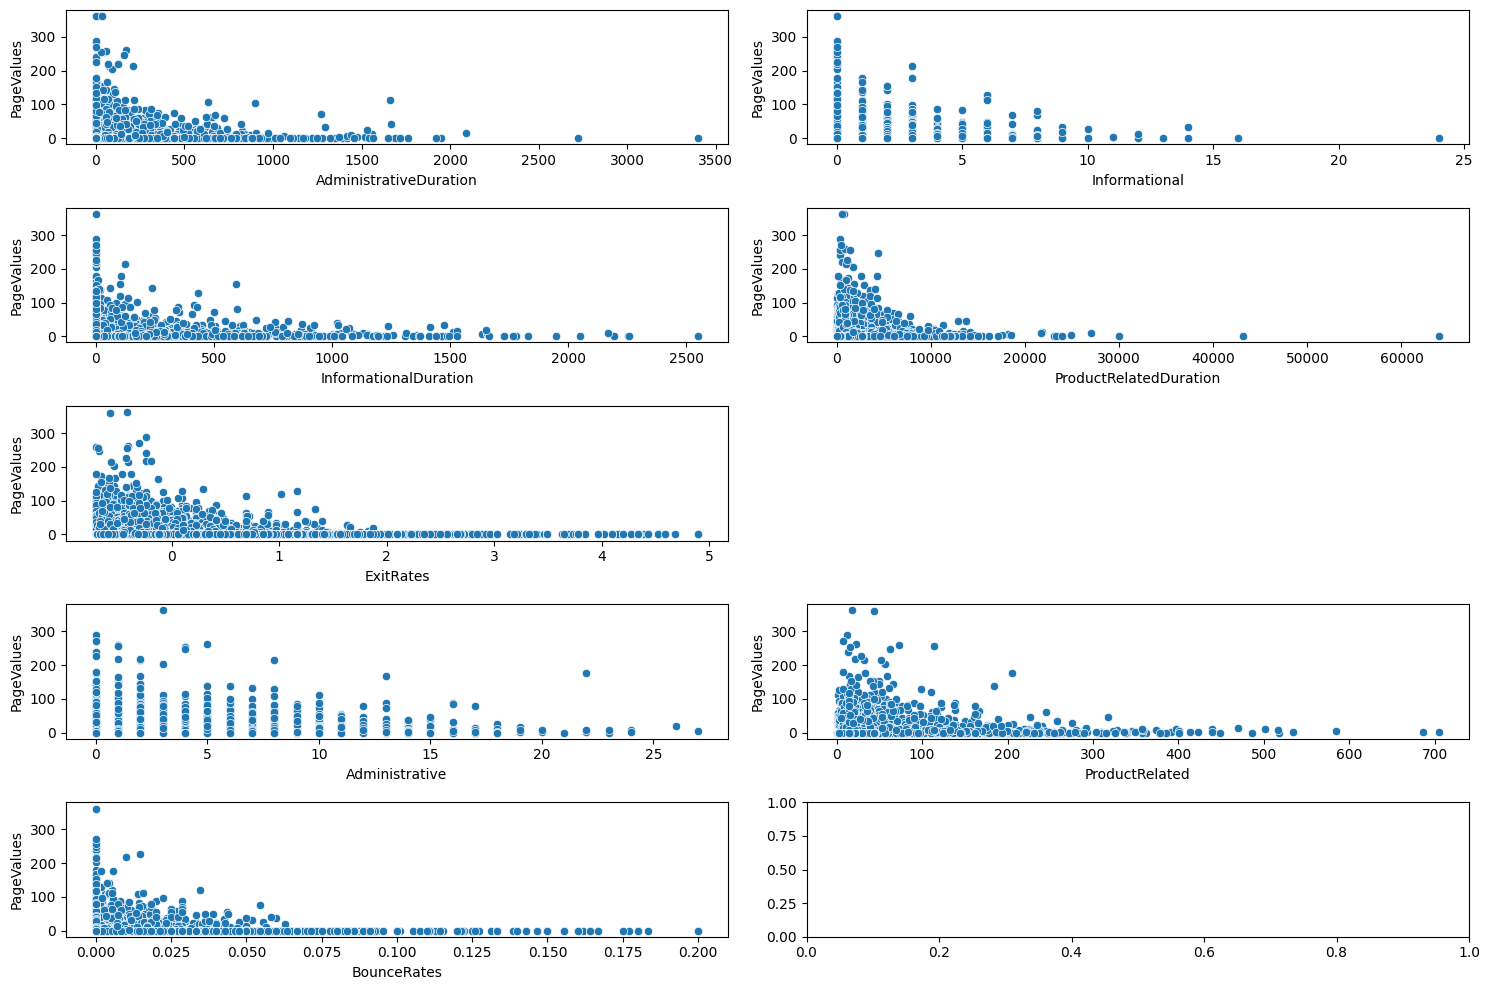

In [14]:
def relacion_numericas(dataframe, variable_respuesta, paleta = 'bright', tamaño_graficas = (15,10)):
    numericas = separar_dataframe(dataframe)[0]
    cols_numericas = numericas.columns
    num_filas = math.ceil(len(cols_numericas) / 2)
    fig, axes = plt.subplots(nrows = num_filas, ncols = 2, figsize = tamaño_graficas)
    axes = axes.flat

    for indice, columna in enumerate(cols_numericas):
        if columna == variable_respuesta:
            fig.delaxes(axes[indice])
            pass
        else:
            sns.scatterplot(x=columna,
                    y=variable_respuesta,
                    data=numericas,
                    ax=axes[indice], 
                    palette=paleta)
    plt.tight_layout()

relacion_numericas(df, 'PageValues')

Si tenemos las columnas con puntos en un lugar, es mejor hacer barplot. Se suponía una correlación negativa (a medida que una crece la otra baja). Para entender mejor hicimos la matriz de correlación.

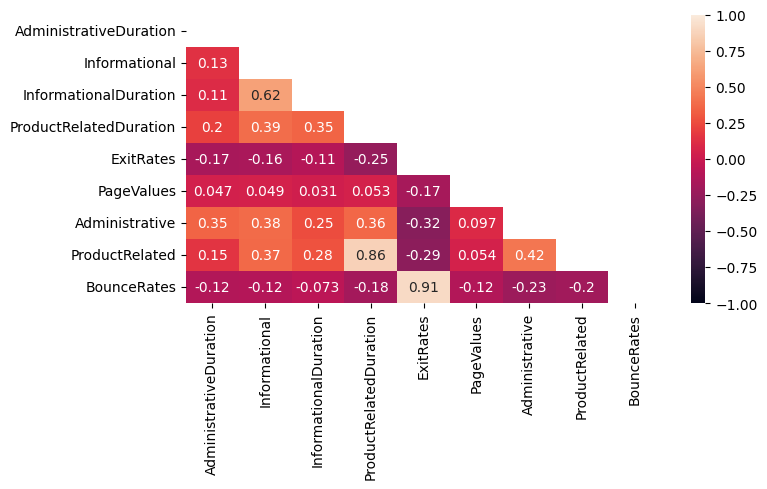

In [15]:
def matriz_correacion(dataframe):
    matriz_corr = dataframe.corr(numeric_only=True) #matriz correlación
    plt.figure(figsize=(8,5))
    mascara = np.triu(np.ones_like(matriz_corr, dtype = np.bool_) )
    sns.heatmap(matriz_corr,
                annot=True,
                vmin=-1,
                vmax=1, 
                mask=mascara)
    plt.tight_layout()
matriz_correacion(df)

Dos correlaciones fuertes visibles. ProductRelated con ProductRelatedDuration tiene sentido de causalidad.

Cuando tengo un caso fuerte, puede eliminar alguna variable. Esto dependerá de cual aporte más a lo que quiero.

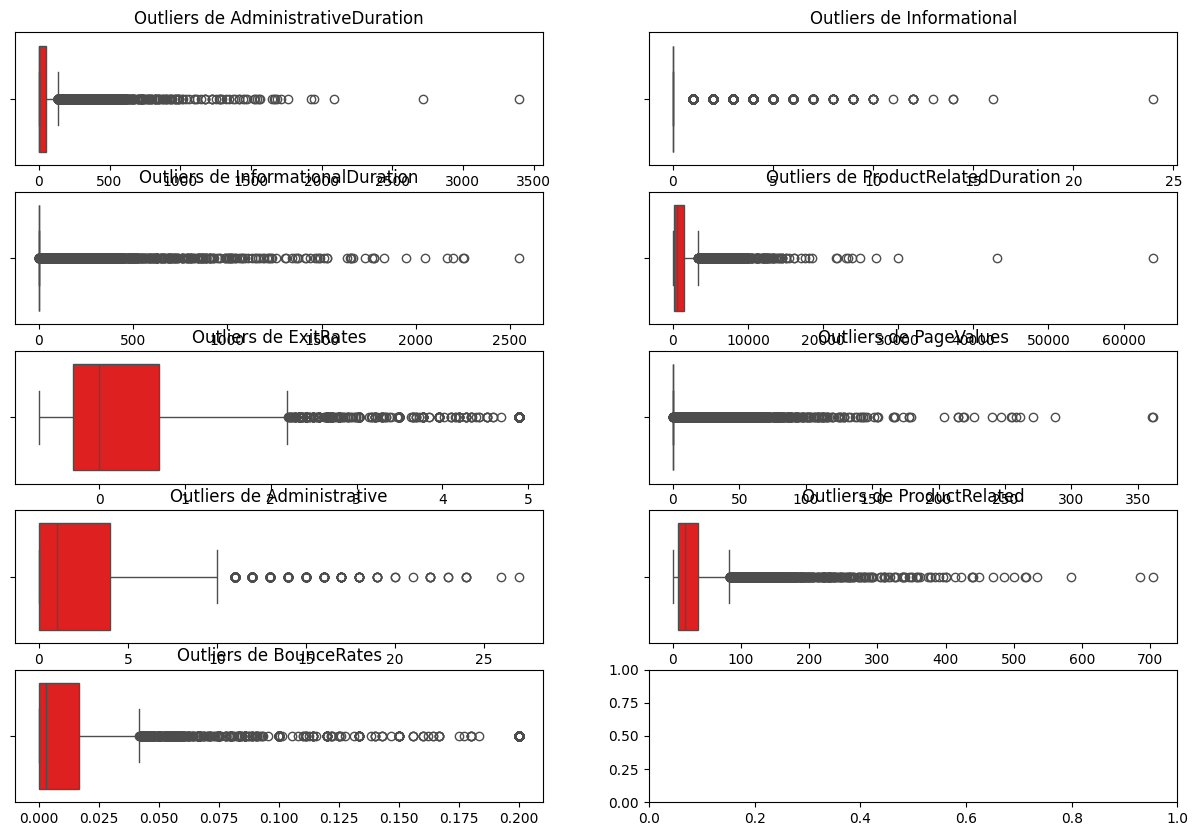

In [16]:
def detectar_outliers(dataframe, color='red', tamaño_grafica=(15,10)):
    df_num = separar_dataframe(dataframe)[0]
    num_filas= math.ceil(len(df_num.columns)/2)
    fig, axes = plt.subplots(ncols=2, nrows=num_filas, figsize=tamaño_grafica)
    axes = axes.flat

    for indice,columna in enumerate(df_num.columns):
        sns.boxplot(x=columna,
                    data=df_num,
                    ax = axes[indice],
                    color=color)
        axes[indice].set_title(f'Outliers de {columna}')
        axes[indice].set_xlabel('')
detectar_outliers(df)

In [17]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [19]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Administrative,ProductRelated,BounceRates
0,0.0,0.0,0.0,0.000000,4.895621,0.0,Feb,MacOS,Mozilla Firefox,Region1,DT,Returning_Visitor,0.0,1.0,0.20
1,0.0,0.0,0.0,64.000000,2.095621,0.0,Feb,Windows,Google Chrome,Region1,OT,Returning_Visitor,0.0,2.0,0.00
2,0.0,0.0,0.0,0.000000,4.895621,0.0,Feb,iOS,Mozilla Firefox,Region9,RT,NaN,NaN,1.0,NaN
3,0.0,0.0,0.0,2.666667,3.215621,0.0,Feb,Linux,Google Chrome,Unknown,SMT,Returning_Visitor,NaN,2.0,0.05
4,0.0,0.0,0.0,627.500000,0.695621,0.0,Feb,Linux,Tor,Region1,SMT,Returning_Visitor,0.0,10.0,0.02


In [20]:
df.shape

(12264, 15)

In [21]:
df.isna().sum()

AdministrativeDuration       0
Informational                0
InformationalDuration        0
ProductRelatedDuration       0
ExitRates                    0
PageValues                   0
Month                      122
OperatingSystems             0
Browser                      0
Region                    1841
TrafficType                 18
VisitorType                616
Administrative            1231
ProductRelated            1109
BounceRates               1576
dtype: int64

In [22]:
df.shape

(12264, 15)

In [23]:
#simple imputer
df_num = df.select_dtypes(include=np.number)
imputer_knn = KNNImputer(n_neighbors=5) #busca 5 vecinos para completarse, por defecto 5
knn_imputados = imputer_knn.fit_transform(df_num) #relleno mis nulos
df_num_sin_nulos = pd.DataFrame(knn_imputados, columns= df_num.columns)
df_knn = df.copy()
df_knn[df_num.columns] = df_num_sin_nulos # mi df sin nulos, le pongo los datos en df_knn, en las columnas numericas (esta en corchetes)
df_knn.isna().sum() #verifico que no tengo nulos en las numéricas

AdministrativeDuration       0
Informational                0
InformationalDuration        0
ProductRelatedDuration       0
ExitRates                    0
PageValues                   0
Month                      122
OperatingSystems             0
Browser                      0
Region                    1841
TrafficType                 18
VisitorType                616
Administrative               0
ProductRelated               0
BounceRates                  0
dtype: int64

In [24]:
df.describe().T # tiene nulos 

,count,mean,std,min,25%,50%,75%,max
AdministrativeDuration,12264.0,53.803570,138.304689,0.000000,0.000000,1.601500,54.000000,3398.750000
Informational,12264.0,0.506279,1.273031,0.000000,0.000000,0.000000,0.000000,24.000000
InformationalDuration,12264.0,34.657915,141.104762,0.000000,0.000000,0.000000,0.000000,2549.375000
ProductRelatedDuration,12264.0,1201.175872,1916.798402,0.000000,189.150000,604.000000,1473.669129,63973.522230
ExitRates,12264.0,0.478012,1.325522,-0.704379,-0.304379,-0.004379,0.695621,4.895621
PageValues,12264.0,5.920952,18.613297,0.000000,0.000000,0.000000,0.000000,361.763742
Administrative,11033.0,2.342880,3.323967,0.000000,0.000000,1.000000,4.000000,27.000000
ProductRelated,11155.0,31.735545,44.475740,0.000000,7.000000,18.000000,38.000000,705.000000
BounceRates,10688.0,0.020922,0.046246,0.000000,0.000000,0.003022,0.016667,0.200000


In [25]:
df_knn.describe().T # aqui ya rellené nulos con knn imputer

,count,mean,std,min,25%,50%,75%,max
AdministrativeDuration,12264.0,53.803570,138.304689,0.000000,0.000000,1.601500,54.000000,3398.750000
Informational,12264.0,0.506279,1.273031,0.000000,0.000000,0.000000,0.000000,24.000000
InformationalDuration,12264.0,34.657915,141.104762,0.000000,0.000000,0.000000,0.000000,2549.375000
ProductRelatedDuration,12264.0,1201.175872,1916.798402,0.000000,189.150000,604.000000,1473.669129,63973.522230
ExitRates,12264.0,0.478012,1.325522,-0.704379,-0.304379,-0.004379,0.695621,4.895621
PageValues,12264.0,5.920952,18.613297,0.000000,0.000000,0.000000,0.000000,361.763742
Administrative,12264.0,2.324935,3.232031,0.000000,0.000000,1.000000,4.000000,27.000000
ProductRelated,12264.0,31.782697,44.049842,0.000000,8.000000,18.000000,38.000000,705.000000
BounceRates,12264.0,0.021122,0.046431,0.000000,0.000000,0.004348,0.016581,0.200000


In [26]:
imputer_iterative = IterativeImputer() #regresion lineal por defecto
iterative_imputado = imputer_iterative.fit_transform(df_num)
df_num_sin_nulos_iterative = pd.DataFrame(iterative_imputado, columns= df_num.columns)
df_iterative = df.copy()
df_iterative[df_num.columns] = df_num_sin_nulos_iterative
df_iterative.head()

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Administrative,ProductRelated,BounceRates
0,0.0,0.0,0.0,0.000000,4.895621,0.0,Feb,MacOS,Mozilla Firefox,Region1,DT,Returning_Visitor,0.000000,1.0,0.200000
1,0.0,0.0,0.0,64.000000,2.095621,0.0,Feb,Windows,Google Chrome,Region1,OT,Returning_Visitor,0.000000,2.0,0.000000
2,0.0,0.0,0.0,0.000000,4.895621,0.0,Feb,iOS,Mozilla Firefox,Region9,RT,NaN,-0.637742,1.0,0.163913
3,0.0,0.0,0.0,2.666667,3.215621,0.0,Feb,Linux,Google Chrome,Unknown,SMT,Returning_Visitor,-0.802449,2.0,0.050000
4,0.0,0.0,0.0,627.500000,0.695621,0.0,Feb,Linux,Tor,Region1,SMT,Returning_Visitor,0.000000,10.0,0.020000


In [27]:
df_iterative.describe().T #en este caso esta no es la más correcta ya que me trae valores negativos

,count,mean,std,min,25%,50%,75%,max
AdministrativeDuration,12264.0,53.803570,138.304689,0.000000,0.000000,1.601500,54.000000,3398.750000
Informational,12264.0,0.506279,1.273031,0.000000,0.000000,0.000000,0.000000,24.000000
InformationalDuration,12264.0,34.657915,141.104762,0.000000,0.000000,0.000000,0.000000,2549.375000
ProductRelatedDuration,12264.0,1201.175872,1916.798402,0.000000,189.150000,604.000000,1473.669129,63973.522230
ExitRates,12264.0,0.478012,1.325522,-0.704379,-0.304379,-0.004379,0.695621,4.895621
PageValues,12264.0,5.920952,18.613297,0.000000,0.000000,0.000000,0.000000,361.763742
Administrative,12264.0,2.343327,3.219277,-3.006516,0.000000,1.000000,3.911016,27.000000
ProductRelated,12264.0,31.836417,43.991215,-29.902971,8.000000,18.000000,38.000000,705.000000
BounceRates,12264.0,0.021177,0.046131,-0.021224,0.000000,0.003448,0.017857,0.200000


Comparar siempre iterative con KNN Imputer

## Estandarización

- Escalado: no tenemos muchos outliers. Muy sensible. 
    - Algoritmo de gradiente y gradiente descendiente, convergen mejor
- Robusto: con mediana e indice IQR, olvida los outliers muy altos.